# Moliere Potential

Simulation data from Figure 8 of [Vorberger et al](https://doi.org/10.1016/j.hedp.2012.12.009)

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Moliere/input_files/moliere_mks.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Moliere/Moliere_Simulation.ipynb).

In [1]:
# Import the usual packages.
%pylab
%matplotlib inline
import os
import pandas as pd

from sarkas.processes import PreProcess, Simulation, PostProcess

# Set the plotting style
plt.style.use('MSUstyle')

# Link to the input file.
input_file = os.path.join('input_files', 'moliere_mks.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Simulation

In [2]:
sim = Simulation(input_file)
sim.setup(read_yaml = True)
sim.run()







 __            _             
/ _\ __ _ _ __| | ____ _ ___ 
\ \ / _` | '__| |/ / _` / __|
_\ \ (_| | |  |   < (_| \__ \
\__/\__,_|_|  |_|\_\__,_|___/
                             


An open-source pure-python molecular dynamics suite for non-ideal plasmas.





* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                   Simulation                                   
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  Moliere_mks
Job directory:  Simulations/Moliere_mks

Equilibration dumps directory: 
 Simulations/Moliere_mks/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/Moliere_mks/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/Moliere_mks/Simulation/Equilibration/EquilibrationEnergy_Moliere_mks.csv
Production Thermodynamics file: 
 Simulations/Moliere_mks/Simulation/Production/ProductionEnerg

  0%|          | 0/1000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 3 min 35 sec


----------------------------- Production ----------------------------- 



  0%|          | 0/5000 [00:00<?, ?it/s]


Production Time: 0 hrs 24 min 6 sec

Total Time: 0 hrs 27 min 43 sec


## Post Processing




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  Moliere_mks
Job directory:  Simulations/Moliere_mks
PostProcessing directory: 
 Simulations/Moliere_mks/PostProcessing

Equilibration dumps directory:  Simulations/Moliere_mks/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/Moliere_mks/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/Moliere_mks/Simulation/Equilibration/EquilibrationEnergy_Moliere_mks.csv
Production Thermodynamics file: 
 Simulations/Moliere_mks/Simulation/Production/ProductionEnergy_Moliere_mks.csv


==================== Radial Distribution Function ==================== 

Data saved in: 
 Simulations/Moliere_mks/PostProcessing/RadialDistributionFunction/Production/RadialDistri

  0%|          | 0/1 [00:00<?, ?it/s]

5000

Radial Distribution Function Calculation Time: 0 sec 82 msec 224 usec 470 nsec


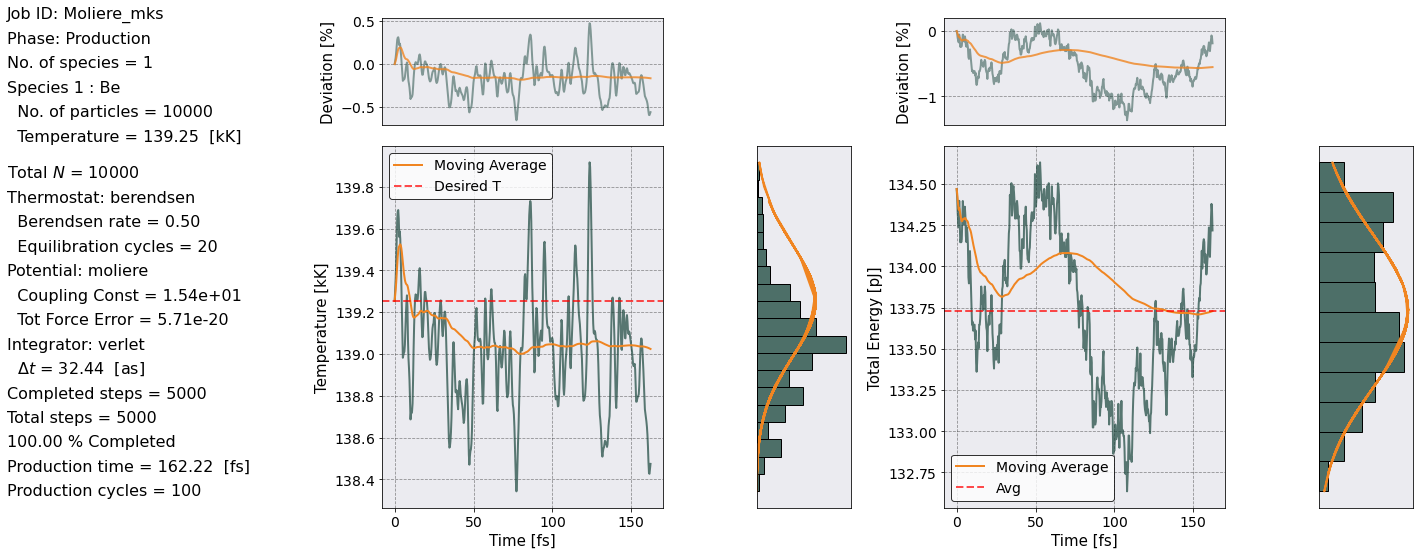

In [3]:
postproc = PostProcess(input_file)
postproc.setup(read_yaml = True)
postproc.run()

<AxesSubplot:title={'center':'Pair Distribution Function'}, xlabel='$r/a_{ws}$'>

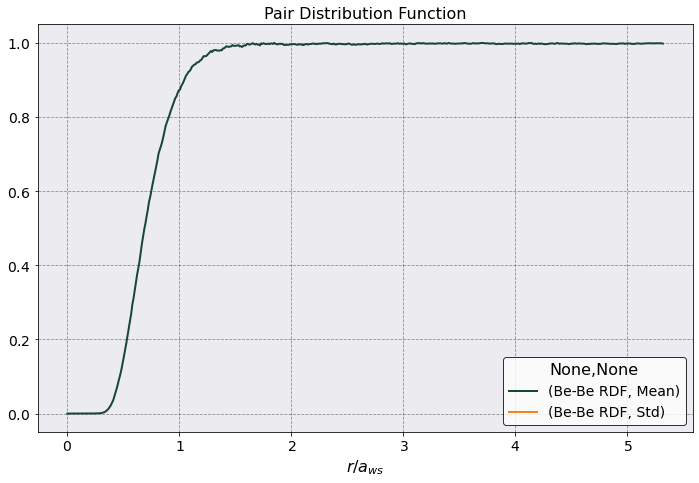

In [4]:
postproc.rdf.plot(scaling= postproc.rdf.a_ws,
                 xlabel = r'$r/a_{ws}$',
                 title = 'Pair Distribution Function')

In [5]:
from sarkas.potentials import moliere as mol
from sarkas.potentials import coulomb as coul

In [7]:
r_array = postproc.parameters.box_lengths[0] * np.linspace(0.001, 1, 1000)
mol_potential = np.zeros(len(r_array))
coul_potential = np.zeros(len(r_array))

# I need to do this, because Numba compiled the function to take in a float and an array not two arrays
for (ir, r) in enumerate(r_array):
    mol_potential[ir], _ = mol.moliere_force(r, postproc.potential.matrix[0, 0])
    coul_potential[ir], _ = coul.coulomb_force(r, postproc.potential.matrix[0, 0])

Text(0.5, 1.0, 'Potential Plot')

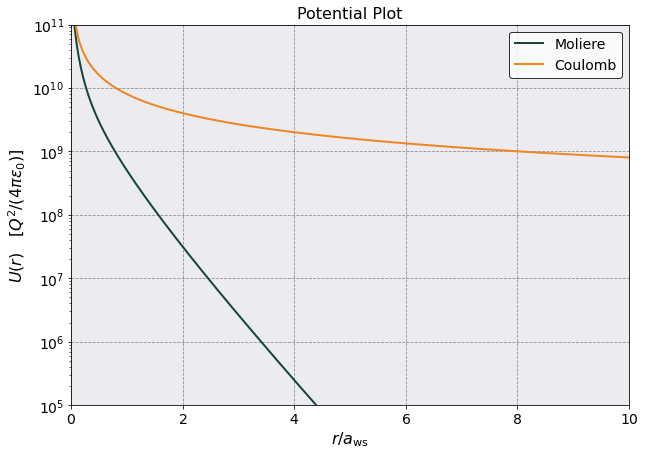

In [8]:
pot_const = postproc.potential.matrix[0,0,0]
plt.plot(r_array/postproc.parameters.a_ws, mol_potential/pot_const, label = 'Moliere')
plt.plot(r_array/postproc.parameters.a_ws, coul_potential/pot_const, label = 'Coulomb')
plt.legend()
plt.yscale('log')
plt.ylabel(r'$U(r)$   [$Q^2/(4\pi \epsilon_0)$]')
plt.xlabel(r'$r/a_{\rm ws}$')
plt.xlim(0,10)
plt.ylim(1e5,1e11)
plt.title('Potential Plot')